In [38]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import osmnx as ox
import pandas as pd
import seaborn as sns

In [3]:
# Load the data
df = pd.read_pickle('data_cabspotting/cabspotting.pkl')

In [4]:
df.head()

latitude  longitude  occupied
user   time                                              
abboip 2008-05-17 14:12:10  37.75153 -122.39447         0
       2008-05-17 14:13:34  37.75149 -122.39447         0
       2008-05-17 14:14:34  37.75149 -122.39447         0
       2008-05-17 14:15:35  37.75149 -122.39446         0
       2008-05-17 14:41:43  37.75144 -122.39449         0

In [8]:
df_abboip = df.loc['abboip']

In [13]:
north, south, east, west = 38.04691, 37.276830000000004, -121.95391333333333, -122.62829

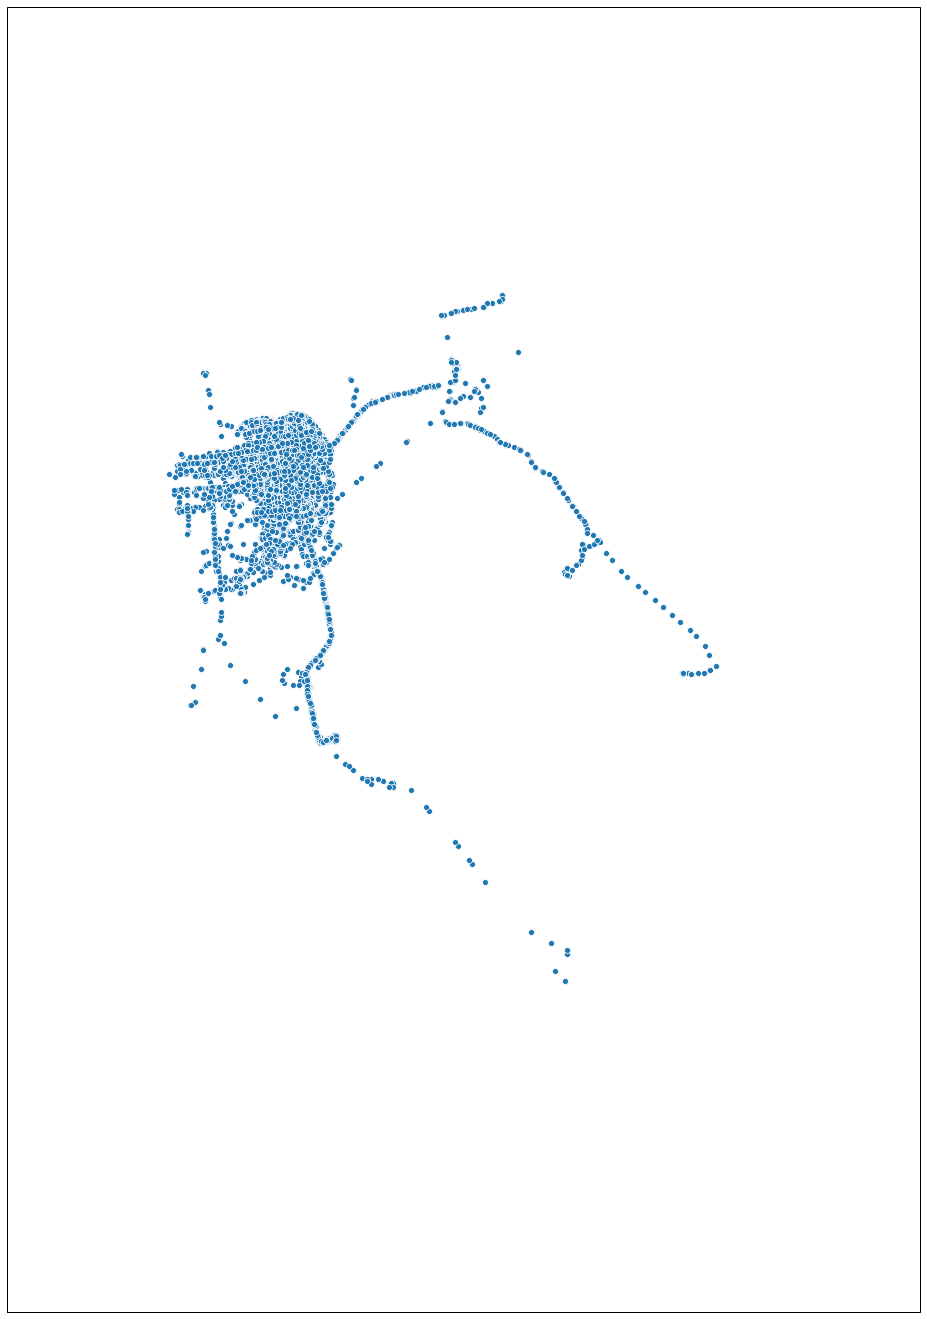

In [44]:
plt.figure(figsize=(24, 24))

ax = plt.axes(projection=ccrs.UTM(10))
ax.set_extent([west, east, south, north])

sns.scatterplot(df_abboip['longitude'], df_abboip['latitude'], transform=ccrs.PlateCarree())

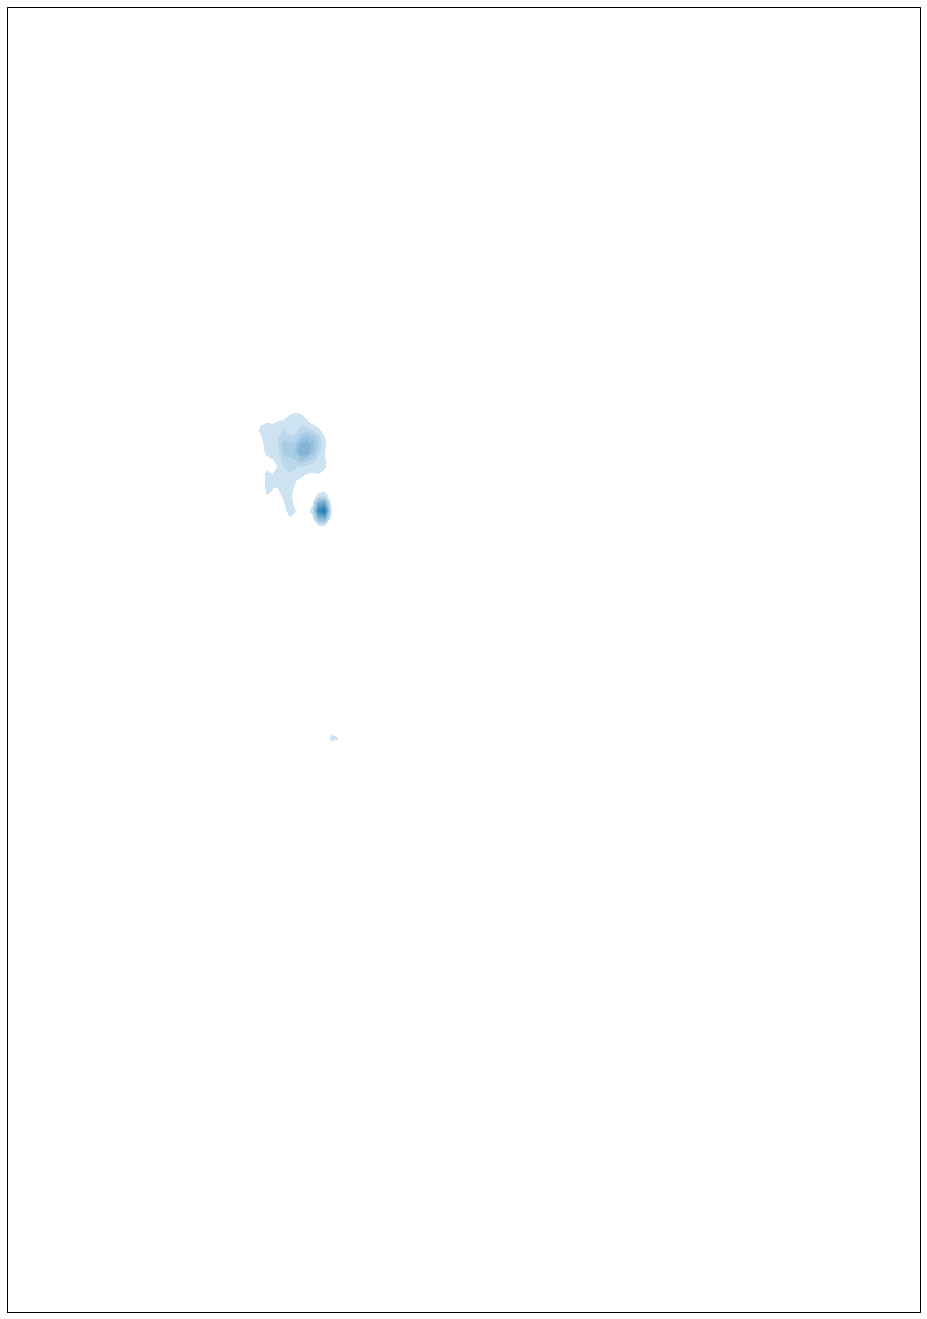

In [45]:
plt.figure(figsize=(24, 24))

ax = plt.axes(projection=ccrs.UTM(10))
ax.set_extent([west, east, south, north])

sns.kdeplot(df_abboip['longitude'], df_abboip['latitude'],
            shade=True, shade_lowest=False, transform=ccrs.PlateCarree())

In [39]:
# Load the OSMNX graph
streets = ox.load_graphml('cabspotting_streets_all.graphml', folder='osmnx_data')

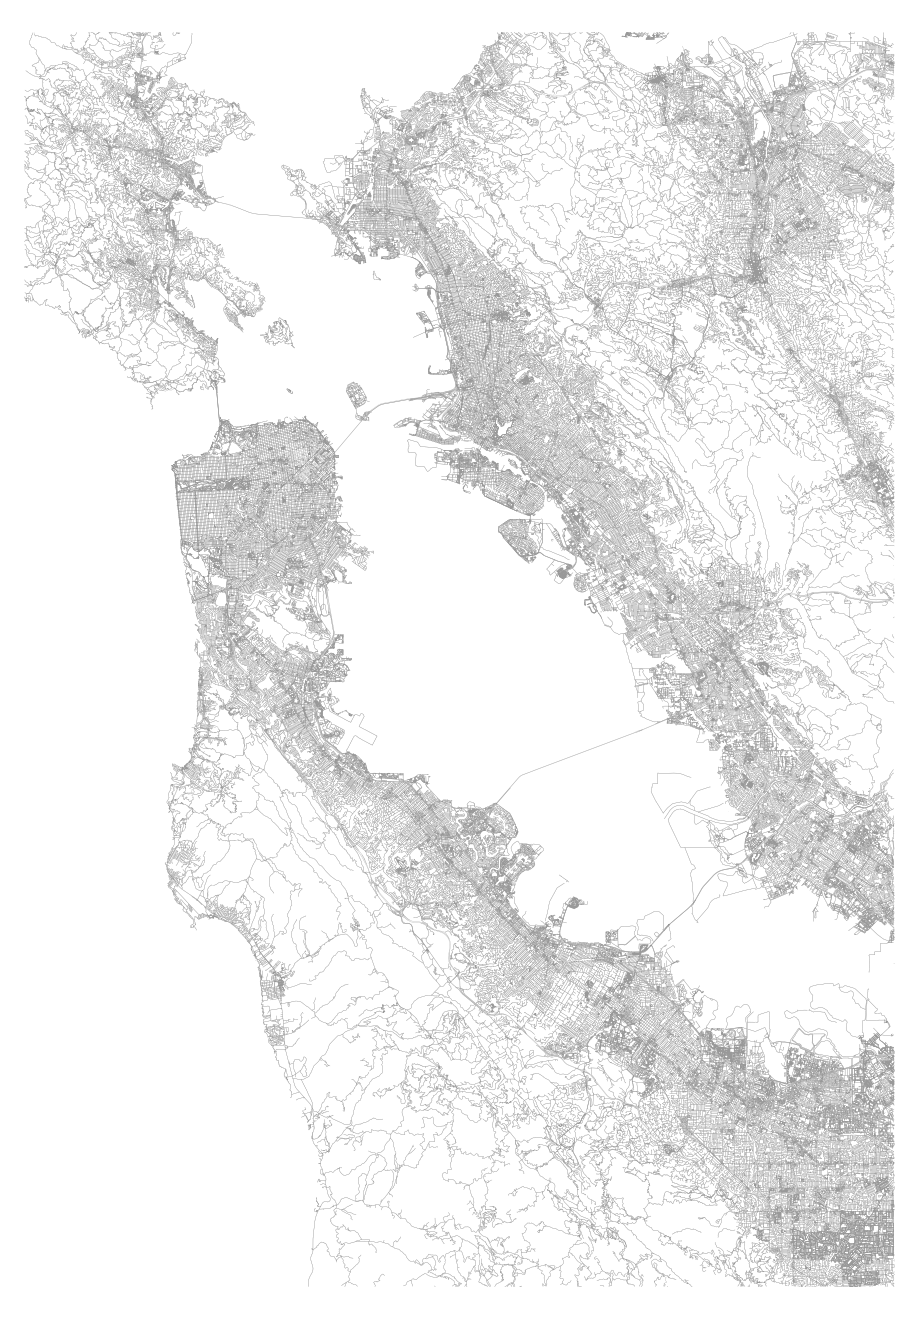

(<Figure size 1513.26x1728 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x3e7046d68>)

In [43]:
ox.plot_graph(streets, fig_height=24, node_size=0, edge_linewidth=0.25)

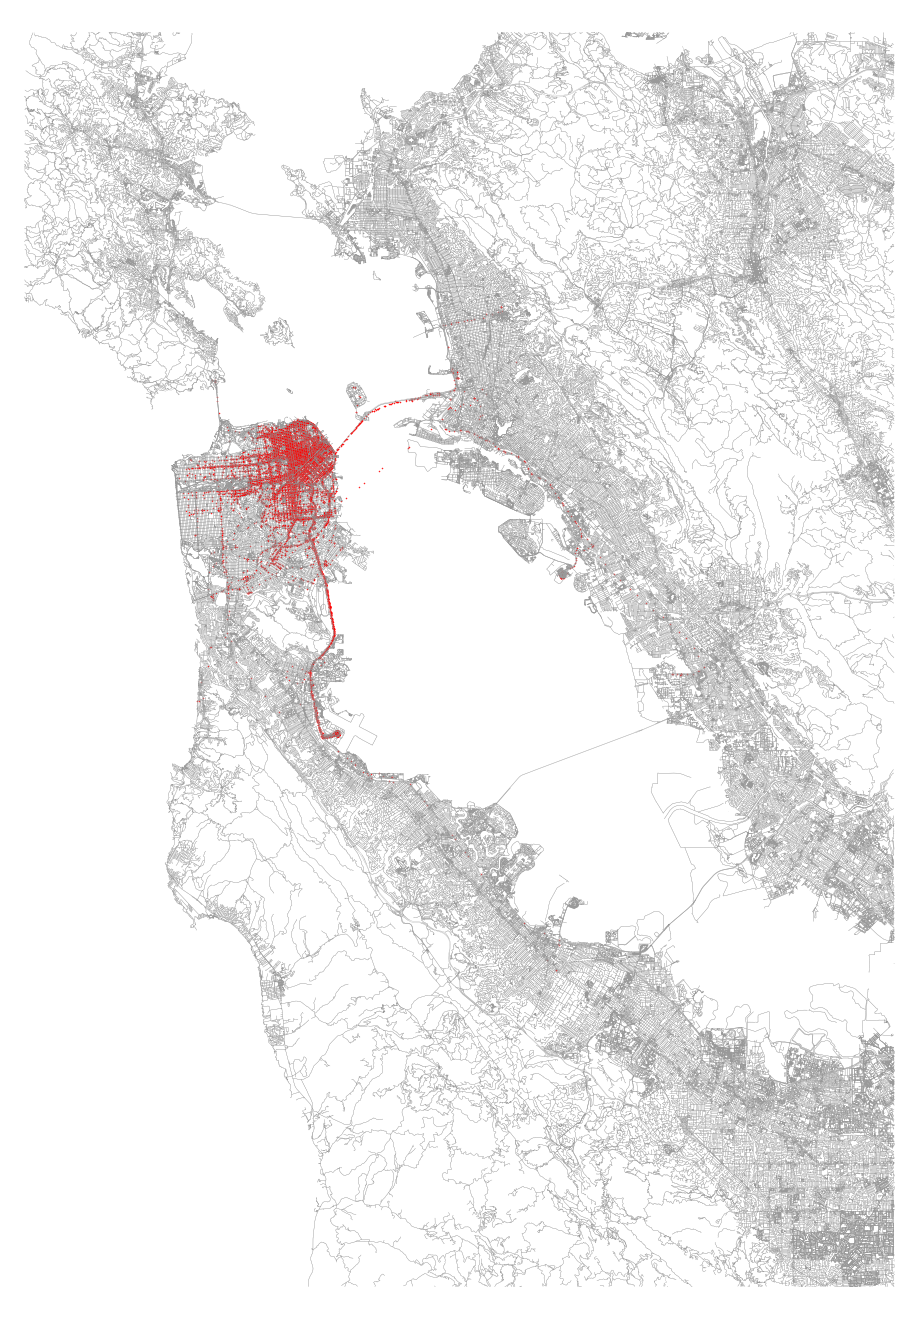

In [62]:
fig, ax = ox.plot_graph(streets, fig_height=24, node_size=0, edge_linewidth=0.25, show=False, close=False)
ax.scatter(df_abboip['longitude'], df_abboip['latitude'], c='#ff0000', s=0.25, alpha=1.0)